# NumPy arrays

Fast and easy to use alternative to slow Python loops.

In [38]:
import numpy as np

In [182]:
# converting Python lists to numpy arrays

u = [1,2,3]
u = np.array(u)
v = np.array([-1,0,1])
w = np.array([1.2,3.4,4.5,6.7])

u, v, w

(array([1, 2, 3]), array([-1,  0,  1]), array([1.2, 3.4, 4.5, 6.7]))

# Basic array operations

In [20]:
# multipy every element of the array u by 2 and subtract 1
2 * u - 1

array([1, 3, 5])

In [17]:
# element-wise addition
u + v

array([0, 2, 4])

In [18]:
# element-wise multiplication
u * v

array([-1,  0,  3])

In [19]:
# element-wise division (note the warning)
u / v

/tmp/ipykernel_53303/352124581.py:2: RuntimeWarning: divide by zero encountered in true_divide
  u / v


array([-1., inf,  3.])

In [21]:
# computing a function of an array
x = np.pi*v
np.sin(x)

array([-1.2246468e-16,  0.0000000e+00,  1.2246468e-16])

In [23]:
# Error! arrays must have "broadcastable" sizes to perform element-wise operations
v + w

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [11]:
# let's make some matrices...

l = np.array([
	[0,1,0],
	[0,0,1],
	[1,0,0]
])

a = np.array([
	[1,0,0],
	[1,2,0],
	[2,3,3]
])

l, a

(array([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]]),
 array([[1, 0, 0],
        [1, 2, 0],
        [2, 3, 3]]))

In [35]:
# 3rd row of "a"
a[2]

array([2, 3, 3])

In [36]:
# 3rd column of "a"
a[:,2]

array([0, 0, 3])

In [37]:
# matrix transposition
a.T

array([[1, 1, 2],
       [0, 2, 3],
       [0, 0, 3]])

In [169]:
# 3D array made by combining "l" and "a"
t = np.array([l,a])
t

array([[[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]],

       [[1, 0, 0],
        [1, 2, 0],
        [2, 3, 3]]])

In [28]:
# "shape" of an array
t.shape

(2, 3, 3)

In [29]:
# retrieve array "l"
t[0]

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [180]:
# and this is "a"
t[1,:,:]

array([[1, 0, 0],
       [1, 2, 0],
       [2, 3, 3]])

In [184]:
# array masks
mask = u<=2
u, mask, u[mask]

(array([1, 2, 3]), array([ True,  True, False]), array([1, 2]))

In [187]:
# list indexing
u[[0,2]], u[[0,0,1,2,1,2]]

(array([1, 3]), array([1, 1, 2, 3, 2, 3]))

# Linear algebra

In [170]:
# vector's (second) norm
v = [1,1,1]
np.linalg.norm(v)

1.7320508075688772

In [172]:
# scalar product of vectors
u = [1,2,3]
v = [-1,0,1]
np.dot(u,v)

2

In [179]:
# matrix acting on a vector
np.dot(l,u)

array([2, 3, 1])

In [44]:
# diagonal matrix with vector "u" as its diagonal
np.diag(u)

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [45]:
# Pauli's matrices
sigma = np.array([
	[
		[0,1],
		[1,0]
	],
	[
		[0,-1j],
		[1j,0]
	],
	[
		[1,0],
		[0,-1]
	]
])

In [49]:
# matrix multiplication
np.dot(sigma[0],sigma[0])

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [51]:
# matrix determinant
np.linalg.det(sigma[1])

(-1+0j)

In [52]:
# calculate eigenvalues ("w") and eigenvectors ("v") of a hermitian matrix
w, v = np.linalg.eigh(sigma[2])
w, v

(array([-1.,  1.]),
 array([[0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j]]))

In [53]:
a

array([[1, 0, 0],
       [1, 2, 0],
       [2, 3, 3]])

In [55]:
# calculate eigenvalues and eigenvectors of a matrix
w, v = np.linalg.eig(a)
w, v

(array([3., 2., 1.]),
 array([[ 0.        ,  0.        ,  0.66666667],
        [ 0.        ,  0.31622777, -0.66666667],
        [ 1.        , -0.9486833 ,  0.33333333]]))

In [61]:
# first eigenvector of "a"
v0 = v.T[0]
v0

array([0., 0., 1.])

In [63]:
# let's check it
np.dot(v0.conj(),np.dot(a,v0))

3.0

In [65]:
# "rebuild" "a" from its diagonal form
v_inv = np.linalg.inv(v)
b = np.diag(w)
b = np.dot(b,v_inv)
b = np.dot(v,b)
b

array([[1., 0., 0.],
       [1., 2., 0.],
       [2., 3., 3.]])

In [69]:
# "rewrite" "a" to its diagonal form
c = np.dot(a,v)
c = np.dot(v_inv,c)
c

array([[ 3.00000000e+00,  0.00000000e+00,  1.11022302e-16],
       [ 0.00000000e+00,  2.00000000e+00, -1.79031691e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [72]:
# make the result more clean...
c[np.abs(c)<1e-15] = 0
c

array([[3., 0., 0.],
       [0., 2., 0.],
       [0., 0., 1.]])

## Randomness  and Statistics 

In [124]:
# generate uniformly distributed random number in range [0,1)
np.random.rand()

0.2543878378763199

In [168]:
# generate random array with elements 3
np.random.rand(3)

array([0.21501164, 0.79841992, 0.74954239])

In [128]:
# generate a random 2x2 matrix
np.random.rand(2,2)

array([[0.43279023, 0.54155537],
       [0.2807707 , 0.04745246]])

In [131]:
# generate 100 normally distributed numbers with mean 0 and standar deviation 1
x = np.random.randn(100)

# rescale the standard deviation to 3
x *= 3

# shift the mean to 1
x += 1

In [133]:
# compute sample mean of "x"
m = np.mean(x)
m

1.5169781356518897

In [137]:
# compute sample standard deviation of "x"
s = np.std(x)
s

3.060408638195837

In [138]:
# this is also standard deviation
np.sqrt(np.mean(x**2)-m**2)

3.060408638195837

In [140]:
# estimate the error of "m"
u = s/np.sqrt(len(x))
u

0.3060408638195837

In [141]:
# generate random 2D array (again)
y = np.random.randn(2,4)
y

array([[ 0.81090262, -0.00624584, -0.36976798,  0.43855009],
       [-0.30461093,  0.12887324,  0.14443233, -0.43410911]])

In [144]:
# compute mean of every row
z = np.mean(y,axis=1)
z

array([ 0.21835972, -0.11635362])

In [148]:
# generate 100 random integers from 1 to 9
np.random.randint(1,9+1,100)

array([3, 3, 4, 7, 9, 9, 8, 4, 8, 5, 1, 6, 1, 1, 1, 4, 7, 3, 7, 3, 8, 5,
       6, 6, 2, 7, 1, 6, 7, 2, 3, 3, 7, 3, 1, 4, 9, 6, 2, 8, 9, 5, 4, 5,
       6, 2, 5, 2, 8, 3, 8, 5, 1, 6, 1, 6, 9, 1, 7, 5, 2, 8, 2, 4, 6, 1,
       1, 3, 8, 4, 1, 3, 1, 5, 5, 8, 1, 6, 1, 3, 6, 8, 2, 8, 4, 9, 8, 4,
       4, 2, 2, 9, 5, 7, 4, 9, 2, 6, 7, 6])

In [152]:
# generate 1000 uncorrelated 3D samples
data = np.random.randn(3,1000)
# calculate 3x3 covariance matrix
np.cov(data)

array([[ 0.97088952, -0.03301162, -0.03333745],
       [-0.03301162,  0.92737843,  0.01083066],
       [-0.03333745,  0.01083066,  1.05410914]])

# Helper functions

In [73]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [75]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [83]:
# plotting
from matplotlib import pyplot as plt

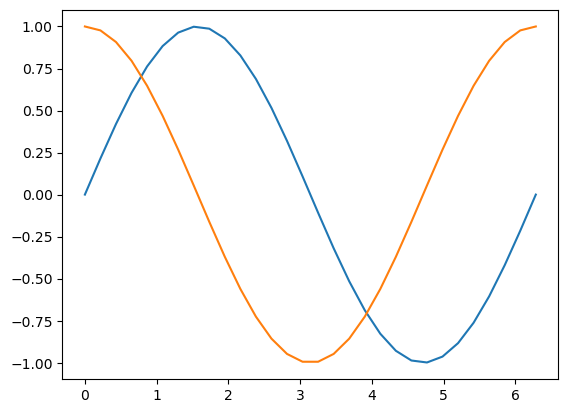

In [100]:
x = np.linspace(0,2*np.pi,30)
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y,x,z)

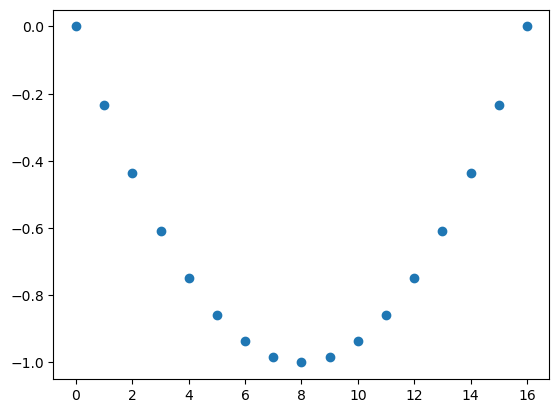

In [93]:
n = np.arange(17)
x = ((n-8)/8)**2 - 1
plt.scatter(n,x)

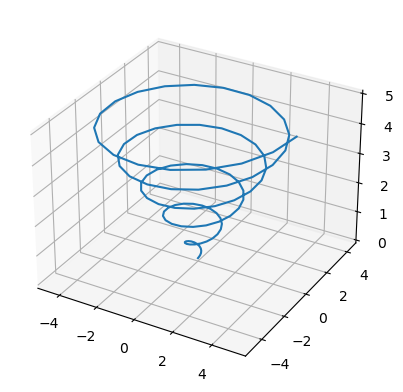

In [98]:
t = np.linspace(0,5,100)
x = np.cos(2*np.pi*t)*t
y = np.sin(2*np.pi*t)*t
ax = plt.axes(projection="3d")
ax.plot3D(x,y,t)

In [116]:
# save and load data to file in a human-readable text format
old_data = np.random.randn(3,20)
np.savetxt("my_data.txt",old_data)
new_data = np.loadtxt("my_data.txt")
print("Are the arrays exactly the same?",(old_data==new_data).all())

Are the arrays exactly the same? True


In [121]:
# save and load "raw" data to file
old_data = np.random.randn(100,100)
np.save("my_data",old_data) # <- notice the lack of .npy extension
new_data = np.load("my_data.npy")
print("Are the arrays exactly the same?",(old_data==new_data).all())

Are the arrays exactly the same? True


# (Discrete) Fourier Transform

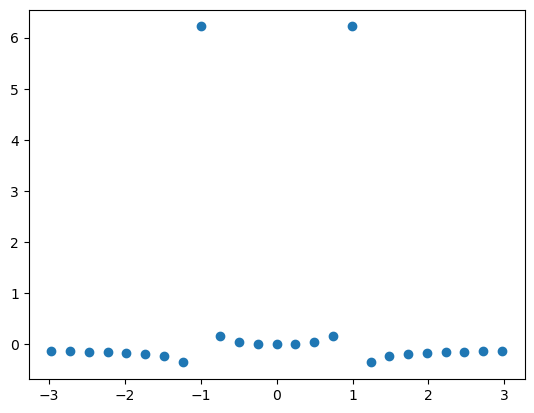

In [167]:
# box length = 4
x = np.linspace(-2,2,101)
dx = x[1]-x[0]

# 1 Hz sine wave in "x space"
y_x = np.sin(2*np.pi*x)

# 1 Hz sine wave in "frequency space"
y_f = np.fft.fft(y_x)

# associated sample frequencies
f = np.fft.fftfreq(len(x),dx)

# plot only in an intresting frequency range
f_mask = np.abs(f)<=3
plt.scatter(f[f_mask],y_f[f_mask])

# Task 0

Plot 3 of your favourite functions.

In [153]:
# solution 0

# Task 1

Generate 3 random orthogonal unit complex vectors in 4 dimensional space.

In [ ]:
# solution 1

# Task 2

Generate Sierpiński triangle and plot it.

In [ ]:
# solution 2

# Task 3

Analyse data stored in file "task3.txt". What is the "effective dimensionality" of this data set? What is represented by this data?

In [143]:
# solution 3

# Task 4

Generate pink noise.

In [ ]:
# solution 4